In [2]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm
from tqdm import trange

## Hyperparameter

In [75]:
batch_size = 64
epoch = 10
learning_rate = 0.01

## MNIST dataset

In [76]:
transform = transforms.ToTensor()
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=False, num_workers=2)

## Define the network

In [94]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Sequential(
            nn.Linear(28*28, 50),
            nn.ReLU()
        )
        self.fc2 = nn.Sequential(
            nn.Linear(50, 10),
            nn.ReLU()
        )
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [78]:
net = Net()
print(net)

Net(
  (fc1): Sequential(
    (0): Linear(in_features=784, out_features=50, bias=True)
    (1): ReLU()
  )
  (fc2): Sequential(
    (0): Linear(in_features=50, out_features=10, bias=True)
    (1): ReLU()
  )
)


## Train the network

In [84]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate)

In [89]:
bar = tqdm(range(epoch))
for e in bar:
    running_loss = 0.0
    for data in iter(trainloader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        bar.set_description('Loss %.2f' % loss)
#         running_loss += loss.item()
#         if i % 100 == 99:    # print every 2000 mini-batches
#             print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
#             running_loss = 0.0

## Test the network

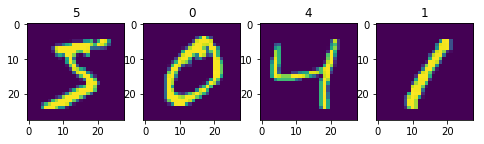

In [93]:
testiter = iter(testloader)
images, labels = testiter.next()
def imshow(images, labels):
    plt.figure(figsize=(8,8))
    bs = images.shape[0]
    for i in range(4):
        plt.subplot(1*100+4*10+1+i)
        curr_img = images[i].squeeze().numpy()
        plt.imshow(curr_img)
        plt.title(str(labels[i].item()))
imshow(images, labels)

In [91]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        pre = torch.max(net(images), 1)[1].numpy()
        correct += (pre == labels).sum().item()
        total += labels.shape[0]

In [92]:
print("Accuracy on %d test images: %.2f%%" % (total, 100*correct/total))

Accuracy on 60000 test images: 85.39%
